## Fundamentals of ML
### Intro to language modelling: Multi Layer Perceptron

### [Makemore](https://github.com/karpathy/nn-zero-to-hero/tree/master/lectures/makemore) by Andrej Karpathy
### [Bengio et al. 2003 MLP language model paper (pdf)](https://www.jmlr.org/papers/volume3/bengio03a/bengio03a.pdf)

![simple_MLP_for_LM](./images/simple_MLP_for_LM.png)

In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt # for making figures

In [3]:
words = open('../ml_with_python/resources/names.txt', 'r').read().splitlines()

In [4]:
words[:7]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia']

In [5]:
len(words)

32033

In [6]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [7]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
X, Y = [], []
for w in words[:7]:
  
  print(w)
  context = [0] * block_size
  for ch in w + '.':
    ix = stoi[ch]
    X.append(context)
    Y.append(ix)
    print(''.join(itos[i] for i in context), '--->', itos[ix])
    context = context[1:] + [ix] # crop and append

emma
... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
olivia
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
ava
... ---> a
..a ---> v
.av ---> a
ava ---> .
isabella
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
sophia
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .
charlotte
... ---> c
..c ---> h
.ch ---> a
cha ---> r
har ---> l
arl ---> o
rlo ---> t
lot ---> t
ott ---> e
tte ---> .
mia
... ---> m
..m ---> i
.mi ---> a
mia ---> .


In [8]:
# build the dataset

block_size = 3 # context length: how many characters do we take to predict the next one?
def build_dataset(words):  
  X, Y = [], []
  for w in words:

    #print(w)
    context = [0] * block_size
    for ch in w + '.':
      ix = stoi[ch]
      X.append(context)
      Y.append(ix)
      #print(''.join(itos[i] for i in context), '--->', itos[ix])
      context = context[1:] + [ix] # crop and append

  X = torch.tensor(X)
  Y = torch.tensor(Y)
  print(X.shape, Y.shape)
  return X, Y


In [9]:
X, Y = build_dataset(words[:5])
print((X.shape, X.dtype), '\n', (Y.shape, Y.dtype))

torch.Size([32, 3]) torch.Size([32])
(torch.Size([32, 3]), torch.int64) 
 (torch.Size([32]), torch.int64)


In [10]:
import random
random.seed(42)

# build the dataset
random.shuffle(words)
n1 = int(0.8*len(words))
n2 = int(0.9*len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [11]:
C = torch.randn((27, 2))
C.shape

torch.Size([27, 2])

In [12]:
C[5]

tensor([-1.5502,  0.0458])

In [13]:
F.one_hot(torch.tensor(5), num_classes=27)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0])

In [14]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-1.5502,  0.0458])

In [15]:
C[torch.tensor([5,5,5,5])]

tensor([[-1.5502,  0.0458],
        [-1.5502,  0.0458],
        [-1.5502,  0.0458],
        [-1.5502,  0.0458]])

In [16]:
emb = C[X]
print(X.shape, '\n', emb.shape)

torch.Size([32, 3]) 
 torch.Size([32, 3, 2])


In [17]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [18]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [19]:
h = torch.tanh(emb.view(-1, 6) @ W1 + b1)

In [20]:
h.shape

torch.Size([32, 100])

In [21]:
h

tensor([[ 0.7143,  0.9972,  0.9978,  ...,  0.4504, -0.9917,  0.8727],
        [ 0.9643,  0.9995, -0.9892,  ...,  0.8368, -0.9997, -0.9994],
        [ 0.9780, -0.4627, -0.9469,  ..., -0.9941, -0.9242,  0.9946],
        ...,
        [ 0.9977,  0.9970,  0.3012,  ...,  0.0878,  0.5584, -0.9931],
        [-0.9531,  0.9483,  0.7717,  ..., -0.8272,  0.7013,  0.9944],
        [-0.8308, -0.5428,  0.7823,  ..., -0.9895, -0.9721,  0.9567]])

In [22]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [23]:
logits = h @ W2 + b2
logits.shape

torch.Size([32, 27])

In [24]:
counts = logits.exp()
prob = counts / counts.sum(1, keepdims=True)
prob.shape

torch.Size([32, 27])

In [25]:
Y, len(Y)

(tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
          1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0]),
 32)

In [26]:
loss = -prob[torch.arange(32), Y].log().mean()
loss

tensor(17.8059)

In [27]:
# the same result, but much more optimal
F.cross_entropy(logits, Y)

tensor(17.8059)

In [28]:
# ------------ now made respectable :) ---------------

In [29]:
Xtr.shape, Ytr.shape # dataset

(torch.Size([182625, 3]), torch.Size([182625]))

In [30]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g) # need (27, 10) for better loss 
W1 = torch.randn((6, 200), generator=g) # and then here is 30 too of course
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [31]:
sum(p.nelement() for p in parameters) # number of parameters in total

6881

In [32]:
for p in parameters:
  p.requires_grad = True

In [39]:
# lre = torch.linspace(-3, 0, 1000)
# lrs = 10**lre
# 
# lri = []
lossi = []
stepi = []

for i in range(20000):
  # minibatch construct
  ix = torch.randint(0, Xtr.shape[0], (32,))
  
  # forward pass
  emb = C[Xtr[ix]] # (32, 3, 2)
  h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 200)
  logits = h @ W2 + b2 # (32, 27)
  loss = F.cross_entropy(logits, Ytr[ix])
  print(loss.item())
  
  # backward pass
  for p in parameters:
    p.grad = None
  loss.backward()
  
  # update
  #lr = lrs[i]
  lr = 0.1 if i < 10000 else 0.01
  for p in parameters:
    p.data += -lr * p.grad

  # track stats
  #lri.append(lre[i])
  stepi.append(i)
  lossi.append(loss.log10().item())

print(loss.item())

2.6129517555236816
2.728548049926758
2.045545816421509
2.417107582092285
2.738544225692749
2.4321794509887695
2.290330410003662
2.941436290740967
2.5955708026885986
2.3552091121673584
2.5047049522399902
2.674553632736206
2.141324281692505
2.6542882919311523
2.420454502105713
2.429523468017578
2.5751519203186035
2.402169704437256
2.4922664165496826
2.521982431411743
2.6673836708068848
2.3648643493652344
2.2038424015045166
2.5889320373535156
2.9138286113739014
2.780066728591919
2.135175943374634
2.539015293121338
3.0604653358459473
2.471731424331665
2.834784507751465
2.6779773235321045
2.951366662979126
2.7575502395629883
2.4891936779022217
2.5589685440063477
2.5779690742492676
2.7111573219299316
2.6022789478302
2.3216750621795654
2.4303925037384033
2.57645845413208
2.3308651447296143
2.8646860122680664
2.4746954441070557
2.50064754486084
2.3904635906219482
2.48586368560791
2.4241864681243896
2.780456066131592
2.679537773132324
2.765472173690796
2.337555170059204
2.41072154045105
2.23295

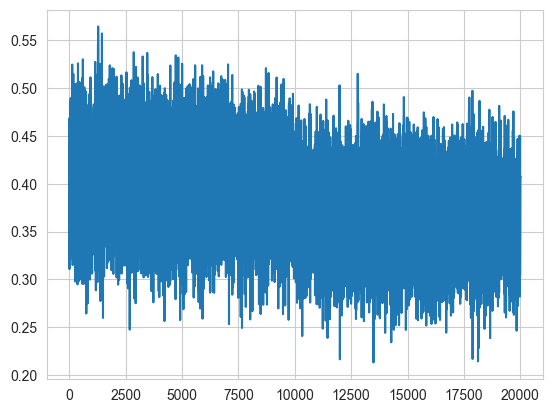

In [40]:
plt.plot(stepi, lossi);

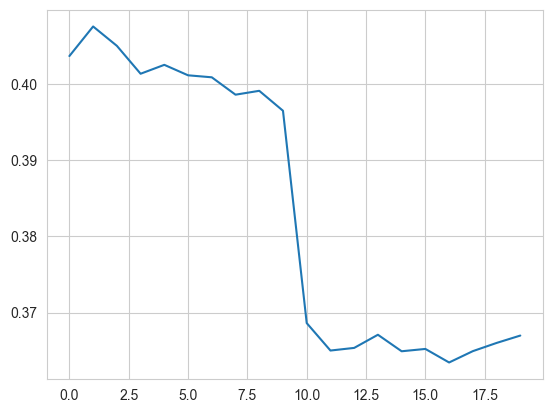

In [43]:
plt.plot(torch.tensor(lossi).view(-1, 1000).mean(1));

In [44]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.3317, grad_fn=<NllLossBackward0>)

In [45]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.3341, grad_fn=<NllLossBackward0>)

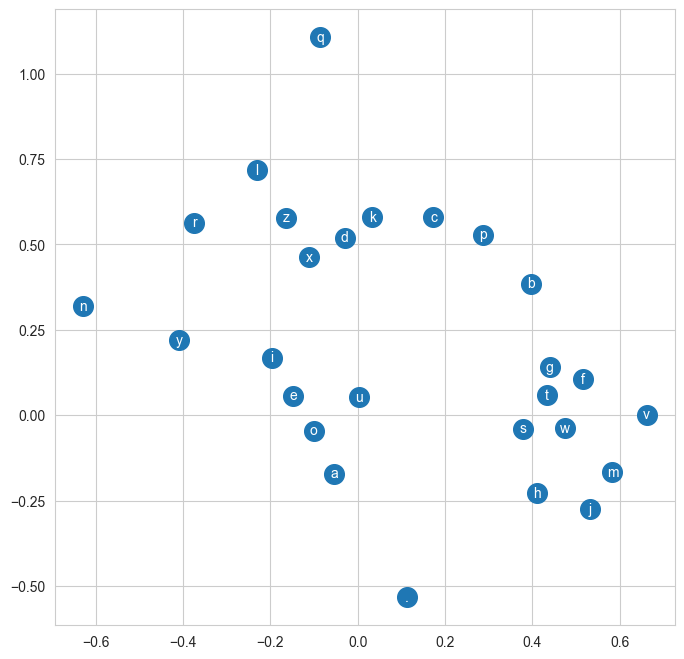

In [46]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color='white')
plt.grid('minor')

In [47]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 2])

In [48]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(15):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

carmah.
amerle.
khiiglex.
thty.
salans.
era.
hute.
dherync.
kaeli.
nelenia.
ceriiv.
kaleig.
dham.
pois.
quian.


What else can you check out?
 
[Building makemore Part2: MLP](https://youtu.be/TCH_1BHY58I)